# A Whale off the Port(folio)
    
# In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [3]:
# Data Cleaning
# In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.Files:
# whale_returns.csv
# algo_returns.csv
# sp500_history.csv

# Whale Returns
#Read the Whale Portfolio daily returns and clean the data

In [7]:
# Reading Whale Returns CSV
whale_returns_csv = Path("/Users/julianoquendo/Desktop/Resources/whale_returns.csv")
whale_pd = pd.read_csv(whale_returns_csv,index_col="Date", parse_dates=True)
whale_pd.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [11]:
# Count The Nulls
whale_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [12]:
# Drop The Nulls
whale_pd.dropna(inplace=True)
whale_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [13]:
# Algorithmic Daily Returns
# Read all of the algorithmic daily returns and clean all the data

In [14]:
# Reading Algorithmic Returns
algo_returns_csv = Path("/Users/julianoquendo/Desktop/Resources/algo_returns.csv")
algo_pd = pd.read_csv(algo_returns_csv,index_col="Date", parse_dates=True)
algo_pd.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [15]:
# Count The Nulls
algo_pd.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [16]:
# Drop The Nulls
algo_pd.dropna(inplace=True)
algo_pd.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [18]:
# S&P 500 Returns
# Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data.

In [88]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("/Users/julianoquendo/Desktop/Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history.sort_index(ascending = True, inplace = True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [89]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [90]:
# Fix Data Types
sp500_history["Close"]= sp500_history["Close"].str.replace('$','').astype("float")
sp500_history.sort_index(inplace = True)
sp500_history

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [96]:
# Drop Nulls
sp500_daily_returns.dropna(inplace = True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [ ]:
# Rename Column
sp500_pd.columns = ["S&P 500"]
sp500_pd.head()
# There is something wrong with my code here - Everytime, it changes the values rather than just renaming the column

In [ ]:
# Combine Whale, Algorithmic, and S&P 500 Returns

In [97]:
# Concatenate All DataFrames Into A Single DataFrame
# Alexis: these are the decimal values, * 100
all_returns = pd.concat([whale_pd,sp500_pd,algo_pd], axis="columns", join="inner")
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,$2107.78,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,$2098.53,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,$2101.04,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,$2071.26,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,$2079.43,-0.005447,0.001303


In [99]:
# Portfolio Analysis
# In this section, you will calculate and visualize performance and risk metrics for the portfolios.

In [ ]:
# Performance
# Calculate And Plot The Daily Returns And Cumulative Returns.

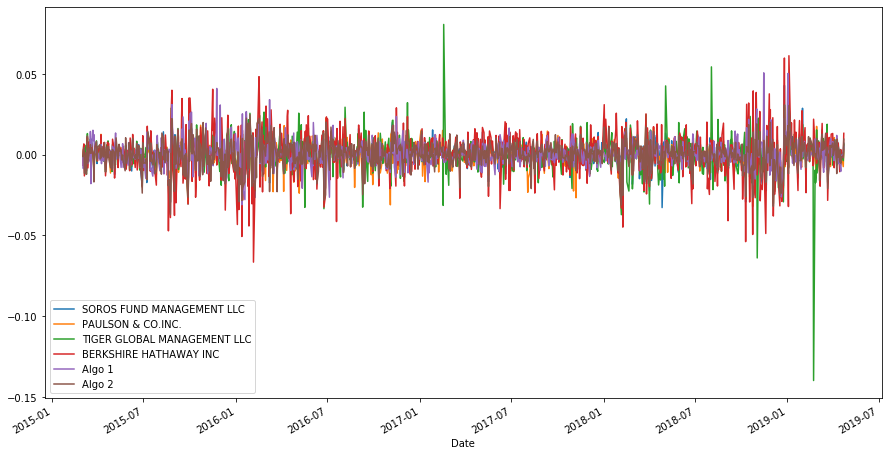

In [109]:
# Plot Daily Returns
all_returns.plot(figsize=(15,8))
# Something is going on here with S&P 500 numbers; They are just gone from plots.

In [ ]:
# Plot cumulative returns
cumulative_returns = (1+all_returns).cumprod() -1
cumulative_returns.plot(figsize=(15,8))
# This is not working either but wanted to save it for code checking later on

In [112]:
# Risk
# Determine the risk of each portfolio:
# 1) Create a box plot for each portfolio. 
# 2) Calculate the standard deviation for all portfolios
# 3) Determine which portfolios are riskier than the S&P 500
# 4) Calculate the Annualized Standard Deviation

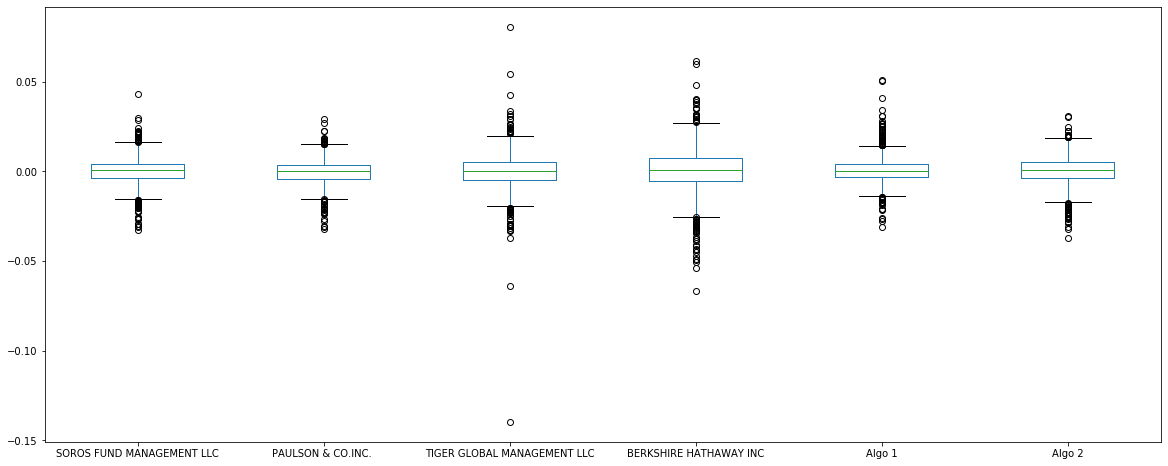

In [114]:
# Box plot to visually show risk
all_returns.plot.box(figsize=(20,8))
# Again, S&P 500 is gone from my analysis. Cannot figure this out.

In [115]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
daily_std = all_returns.std()
print(daily_std)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
dtype: float64


In [118]:
# Determine which portfolios are riskier than the Algo 1
riskier = daily_std[daily_std > daily_std["Algo 1"]]
print(riskier) # Using Algo 1 in place of S & P 500 moving forward as it has disappearred from my data set

SOROS FUND MANAGEMENT LLC      0.007895
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 2                         0.008342
dtype: float64


In [120]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
dtype: float64

In [121]:
# Rolling Statistics
# Risk changes over time. Analyze the rolling statistics for Risk and Beta. 
# 1) Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
# 2) Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
# 3) Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
# 4) An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

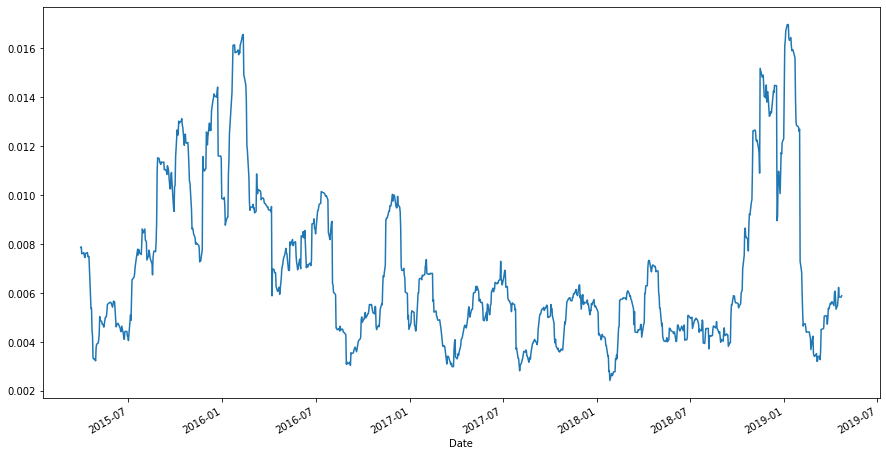

In [132]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 (Algo 1)* and whale portfolios using a 21 trading day window
all_returns["Algo 1"].rolling(window=21).std().plot(figsize=(15,8))

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000


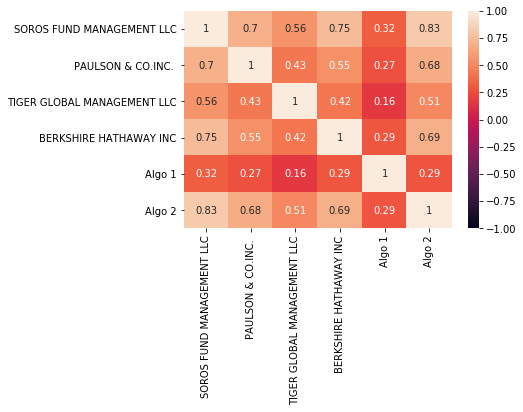

In [133]:
# Correlation Table
import seaborn as sns
correlation = all_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1,annot=True,)
correlation

In [134]:
# Calculate Beta for a single portfolio compared to the total market (Algo 1)
covariance = all_returns['BERKSHIRE HATHAWAY INC'].cov(all_returns['Algo 1'])
variance = all_returns['Algo 1'].var()
algo1_beta = covariance / variance
algo1_beta

0.495087646032836

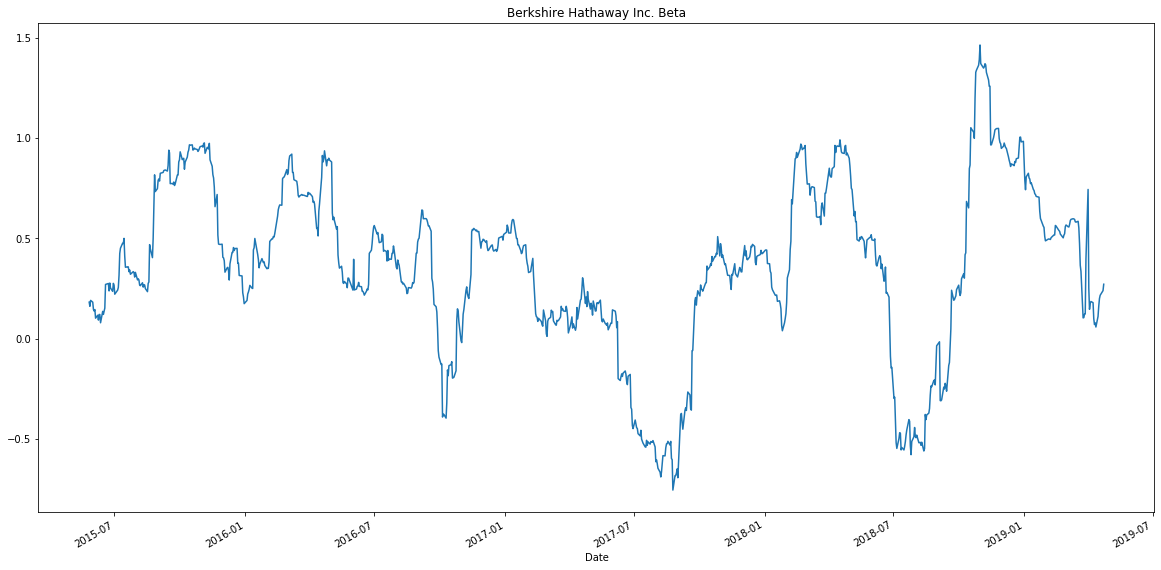

In [142]:
# Calculate Beta for a single portfolio compared to the total market (Algo 1)
covariance = all_returns["BERKSHIRE HATHAWAY INC"].cov(all_returns["Algo 1"])
covariance
variance = all_returns['Algo 1'].var()
berkshire_beta = covariance / variance
rolling_covariance = all_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(all_returns['Algo 1'])
rolling_variance = all_returns['Algo 1'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Berkshire Hathaway Inc. Beta')

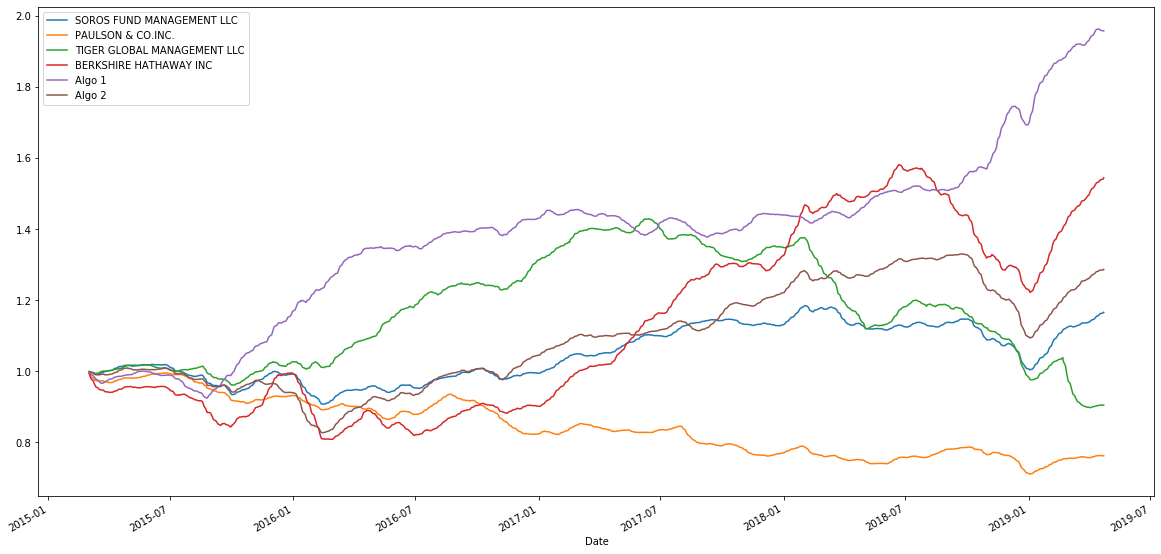

In [145]:
# Calculate a rolling window using the exponentially weighted moving average. 
# I attempted a few different codes here and scoured Google but I could not figure this one out confidently. I hope this is right!
df_daily_ewm = all_returns.ewm(span = 21,adjust = False).mean()
(1+df_daily_ewm).cumprod().plot(figsize = (20,10))

In [ ]:
# Sharpe Ratios
# In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)
# 1) Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
# 2) Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [147]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
dtype: float64

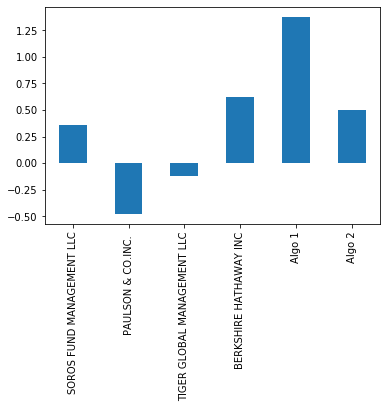

In [148]:
# Visualize The Sharpe Ratios As A Bar Plot
sharpe_ratios.plot.bar()

In [149]:
# Portfolio Returns
# In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 
# Visit Google Sheets and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
# Download the data as CSV files and calculate the portfolio returns.
# Calculate the returns for each stock.
# Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
# Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?

In [150]:
# Your analysis should include the following:

# Using all portfolios:
# The annualized standard deviation (252 trading days) for all portfolios.
# The plotted rolling standard deviation using a 21 trading day window for all portfolios.
# The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
# A correlation table.


# Using your custom portfolio and one other of your choosing:
# The plotted beta.

In [151]:
# Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [162]:
# Read The First Stock
aapl_history = pd.read_csv(Path("/Users/julianoquendo/Desktop/Resources/appl_history.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
aapl_history.rename(columns = {"Close":"AAPL"}, inplace = True)
aapl_history.head()

,AAPL,AAPL
Date,,
2019-07-22 16:00:00,NaN,207.22
2019-07-23 16:00:00,NaN,208.84
2019-07-24 16:00:00,NaN,208.67
2019-07-25 16:00:00,NaN,207.02
2019-07-26 16:00:00,NaN,207.74


In [161]:
# Read the second stock
twtr_history = pd.read_csv(Path("/Users/julianoquendo/Desktop/Resources/twitter_history.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
twtr_history.rename(columns = {"Close":"TWTR"}, inplace = True)
twtr_history.head()

,TWTR,TWTR
Date,,
2019-07-22 16:00:00,NaN,37.58
2019-07-23 16:00:00,NaN,37.90
2019-07-24 16:00:00,NaN,38.73
2019-07-25 16:00:00,NaN,38.12
2019-07-26 16:00:00,NaN,41.52


In [163]:
# Read The Third Stock
lulu_history = pd.read_csv(Path("/Users/julianoquendo/Desktop/Resources/lululemon_history.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
lulu_history.rename(columns = {"Close":"LULU"}, inplace = True)
lulu_history.head()

,LULU,LULU
Date,,
2019-07-22 16:00:00,NaN,187.75
2019-07-23 16:00:00,NaN,189.07
2019-07-24 16:00:00,NaN,192.21
2019-07-25 16:00:00,NaN,191.21
2019-07-26 16:00:00,NaN,190.61


In [164]:
# Concatenate all stocks into a single DataFrame
my_stocks = pd.concat((aapl_history, twtr_history, lulu_history), axis = 1, join= "inner")
my_stocks.sort_index(ascending = True, inplace = True)
my_stocks.head()

,AAPL,AAPL,TWTR,TWTR,LULU,LULU
Date,,,,,,
2019-07-22 16:00:00,NaN,207.22,NaN,37.58,NaN,187.75
2019-07-23 16:00:00,NaN,208.84,NaN,37.90,NaN,189.07
2019-07-24 16:00:00,NaN,208.67,NaN,38.73,NaN,192.21
2019-07-25 16:00:00,NaN,207.02,NaN,38.12,NaN,191.21
2019-07-26 16:00:00,NaN,207.74,NaN,41.52,NaN,190.61


In [165]:
# Reset The Index
my_stocks.index = my_stocks.index.normalize()

In [ ]:
# Pivot so that each column of prices represents a unique symbol
# Already done

In [167]:
# Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [196]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
my_portfolio = my_stocks.dot(weights)
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.dropna(inplace = True)
my_portfolio_returns.head()

IndexError: tuple index out of range

In [ ]:
# This error is killing me; What am I doing wrong? I feel like I did everything I could but nothing is working.
# Going to truck along with errors and solve as I think would be best as this is where everything went wrong for me!

In [ ]:
# Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [197]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
portfolio_returns = pd.concat((my_portfolio_returns,df_daily), axis = 1, join = "inner")
portfolio_returns.rename(columns = {0:"my_portfolio"}, inplace = True)
portfolio_returns

NameError: name 'my_portfolio_returns' is not defined

In [198]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace=True)
portfolio_returns

NameError: name 'portfolio_returns' is not defined

In [ ]:
# Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [199]:
# Risk
portfolio_std = pd.DataFrame(portfolio_returns.std()).rename(columns = {0:"std"})
portfolio_std

NameError: name 'portfolio_returns' is not defined

In [201]:
# Rolling
my_portfolio_rolling_15 = portfolio_returns[["my_portfolio"]].rolling(window = 15).std()
my_portfolio_rolling_60 = portfolio_returns[["my_portfolio"]].rolling(window = 60).std()
my_portfolio_rolling_120 = portfolio_returns[["my_portfolio"]].rolling(window = 120).std()
ax = my_portfolio_rolling_15.plot(figsize = (20,10), title = 'my portfolio std')
my_portfolio_rolling_60.plot(ax = ax)
my_portfolio_rolling_120.plot(ax = ax)
ax.legend(['rolling_15','rolling_60','rolling_120'])

NameError: name 'portfolio_returns' is not defined

In [202]:
# Annualzied Sharpe Ratios
trading_days = portfolio_returns.count()
sharpe_ratios = portfolio_returns.mean()*trading_days/(portfolio_returns.std()*np.sqrt(trading_days))

NameError: name 'portfolio_returns' is not defined

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = "sharpe ratios")

In [203]:
# Create a correlation analysis
correlation_my_portfolio = portfolio_returns.corr().loc[:,"my_portfolio"]
correlation_my_portfolio[
    correlation_my_portfolio==correlation_my_portfolio[correlation_my_portfolio<1].max()]

NameError: name 'portfolio_returns' is not defined

In [204]:
# Beta
rolling_covariance = portfolio_returns['my_portfolio'].rolling(window=60).cov(portfolio_returns['sp500'])
rolling_variance = portfolio_returns['sp500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of my portfolio')

NameError: name 'portfolio_returns' is not defined